In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import zscore 


df = pd.read_csv('../data/benin-malanville.csv')


## Summary Statistics & Missing-Value Report


In [3]:
numeric_cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust', 'Tamb', 'RH', 'WSstdev', 'WD' ,'WDstdev', 'BP', 'Cleaning','Precipitation', 'TModA'  ]
print(df[numeric_cols].describe())

                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      240.559452     167.187516     115.358961     236.589496   
std       331.131327     261.710501     158.691074     326.894859   
min       -12.900000      -7.800000     -12.600000       0.000000   
25%        -2.000000      -0.500000      -2.100000       0.000000   
50%         1.800000      -0.100000       1.600000       4.500000   
75%       483.400000     314.200000     216.300000     463.700000   
max      1413.000000     952.300000     759.200000    1342.300000   

                ModB             WS         WSgust           Tamb  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      228.883576       2.121113       2.809195      28.179683   
std       316.536515       1.603466       2.029120       5.924297   
min         0.000000       0.000000       0.000000      11.000000   
25%         0.000000       1.0000

In [4]:
missing_report = df.isna().sum() / len(df) * 100  # Percentage of missing values
missing_above_5 = missing_report[missing_report > 5]  # Filter > 5%

print("Columns with >5% missing values (%):")
print(missing_above_5)

Columns with >5% missing values (%):
Comments    100.0
dtype: float64


## Outlier Detection & Basic Cleaning

### Outliner detection

In [5]:
cols_to_check = ['GHI', 'DNI', 'DHI']

z_scores = df[cols_to_check].apply(zscore, nan_policy='omit')
outliers_mask = np.abs(z_scores) > 3
print("=== Outliers per Column (|Z-score| > 3) ===")
for col in cols_to_check:
    col_outliers = df.loc[outliers_mask[col], col]
    
    if not col_outliers.empty:
        print(f"\nColumn: {col}")
        print("-----------------")
        print(col_outliers)
    else:
        print(f"\nColumn: {col} - No outliers detected.")


=== Outliers per Column (|Z-score| > 3) ===

Column: GHI
-----------------
671       1274.0
674       1349.0
676       1334.0
849       1253.0
850       1324.0
           ...  
517777    1268.0
520659    1280.0
520696    1244.0
522074    1262.0
522075    1289.0
Name: GHI, Length: 89, dtype: float64

Column: DNI - No outliers detected.

Column: DHI
-----------------
670       610.6
671       615.2
672       612.8
673       593.2
674       618.0
          ...  
524896    604.2
524900    591.5
524901    596.1
524916    599.5
524917    593.2
Name: DHI, Length: 3738, dtype: float64


### Missing values

In [6]:
missing_report = df[cols_to_check].isna().sum()
print("Missing values:\n", missing_report[missing_report > 0])

Missing values:
 Series([], dtype: int64)


### Incorrect entries

In [7]:
for col in ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'RH', 'WS', 'WSgust', 'WSstdev', 'BP', 'Cleaning', 'Precipitation']:
    negatives = (df[col] < 0).sum()
    if negatives > 0:
        print(f"Warning: {negatives} negative values found in '{col}'")


In [8]:
## Cleaning

In [9]:

## invalid negative values
invalid_negative_cols = [
    'GHI', 'DNI', 'DHI'
]
# Replace negatives with NaN
df[invalid_negative_cols] = df[invalid_negative_cols].applymap(lambda x: x if x >= 0 else None)


/tmp/ipykernel_255369/3401128404.py:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[invalid_negative_cols] = df[invalid_negative_cols].applymap(lambda x: x if x >= 0 else None)


In [10]:
## fix outliers
df[cols_to_check] = df[cols_to_check].mask(outliers_mask, np.nan)

In [11]:
## Dropping the Empty Comments Column

df.drop(columns=['Comments'], inplace=True)

## Export the Cleaned DataFrame

In [12]:
output_path = "../data/benin-malanville_clean.csv"
df.to_csv(output_path)

# Time Series Analysis

In [13]:
df_clean = pd.read_csv('../data/benin-malanville_clean.csv')

## Line or bar charts of GHI, DNI, DHI, Tamb vs. Timestamp.


In [14]:
df_clean = pd.read_csv('../data/benin-malanville_clean.csv', parse_dates=["Timestamp"])

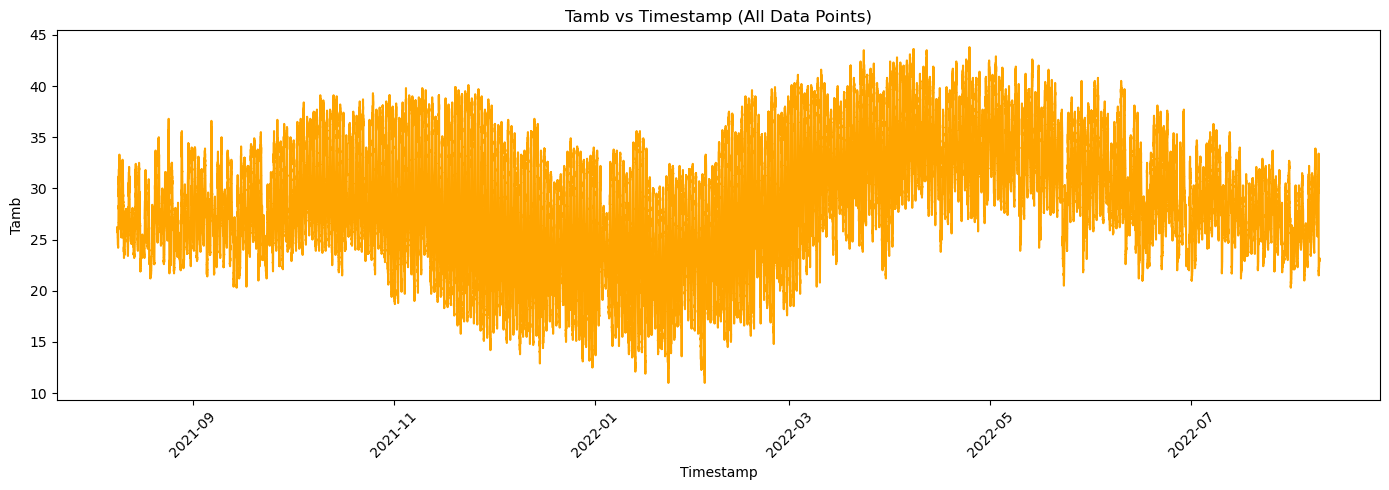

In [15]:
plt.figure(figsize=(14, 5))
plt.plot(df_clean['Timestamp'], df_clean['Tamb'], color='orange')
plt.xlabel('Timestamp')
plt.ylabel('Tamb')
plt.title('Tamb vs Timestamp (All Data Points)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

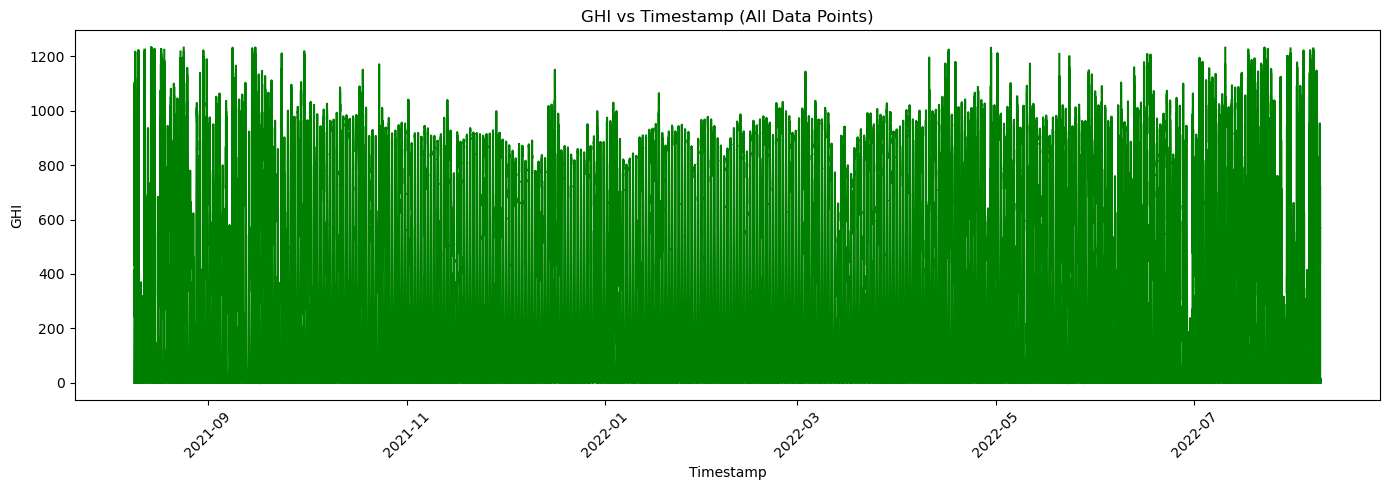

In [16]:
plt.figure(figsize=(14, 5))
plt.plot(df_clean['Timestamp'], df_clean['GHI'], color='green')
plt.xlabel('Timestamp')
plt.ylabel('GHI')
plt.title('GHI vs Timestamp (All Data Points)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

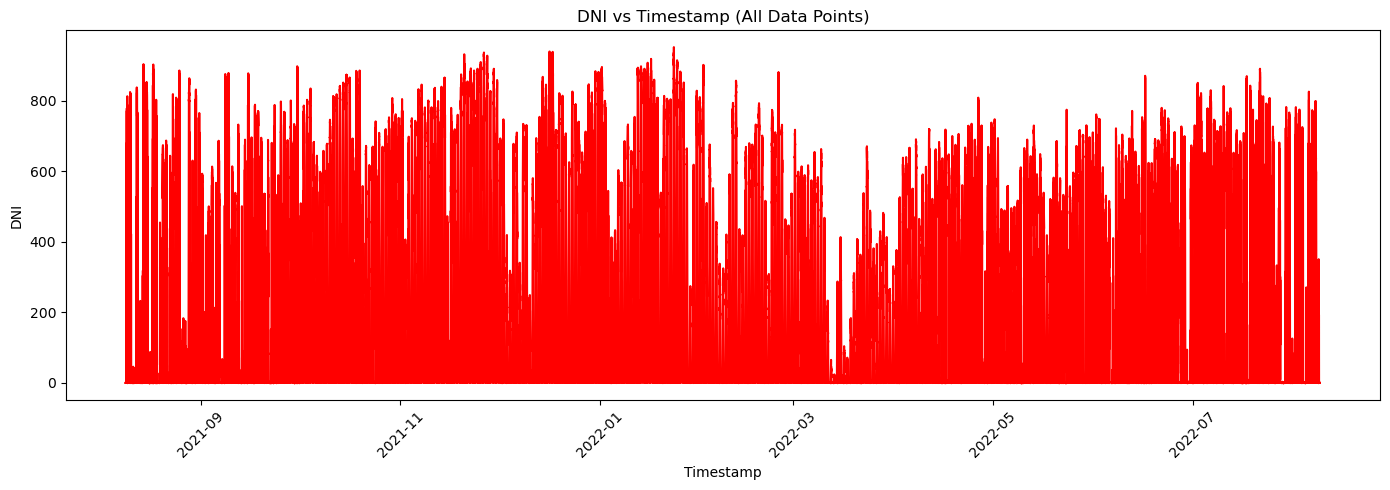

In [17]:
plt.figure(figsize=(14, 5))
plt.plot(df_clean['Timestamp'], df_clean['DNI'], color='red')
plt.xlabel('Timestamp')
plt.ylabel('DNI')
plt.title('DNI vs Timestamp (All Data Points)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

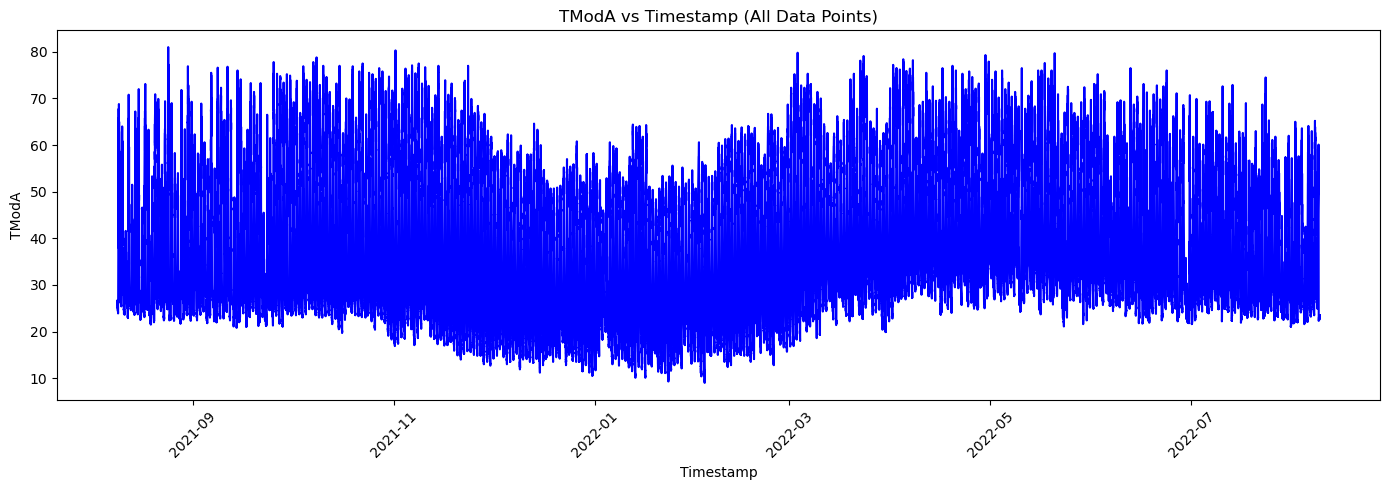

In [18]:
plt.figure(figsize=(14, 5))
plt.plot(df_clean['Timestamp'], df_clean['TModA'], color='blue')
plt.xlabel('Timestamp')
plt.ylabel('TModA')
plt.title('TModA vs Timestamp (All Data Points)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

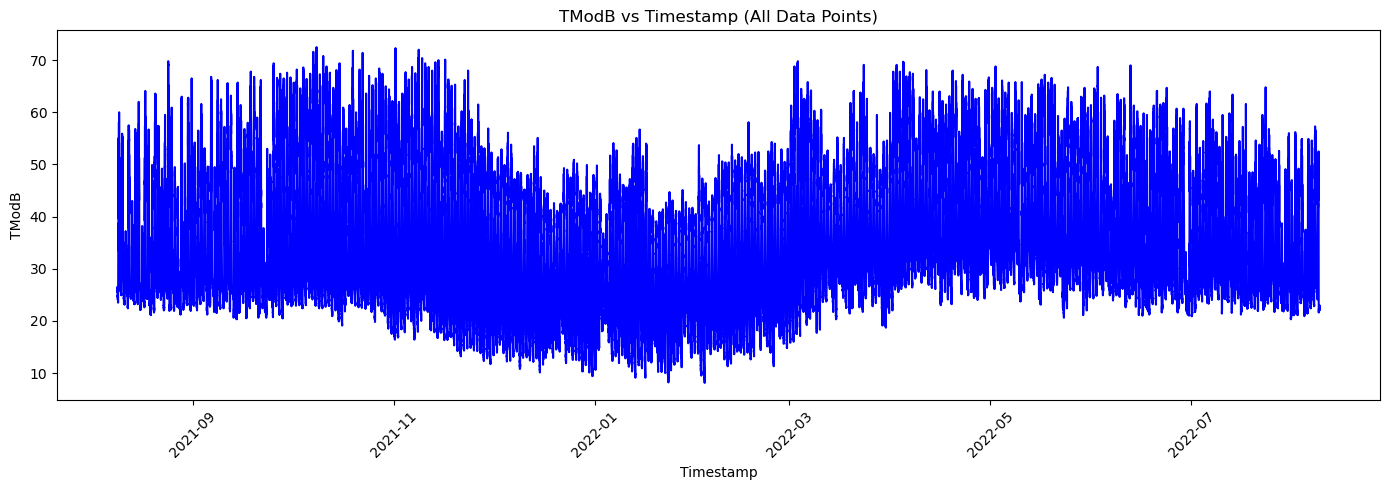

In [19]:
plt.figure(figsize=(14, 5))
plt.plot(df_clean['Timestamp'], df_clean['TModB'], color='blue')
plt.xlabel('Timestamp')
plt.ylabel('TModB')
plt.title('TModB vs Timestamp (All Data Points)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Correlation & Relationship Analysis

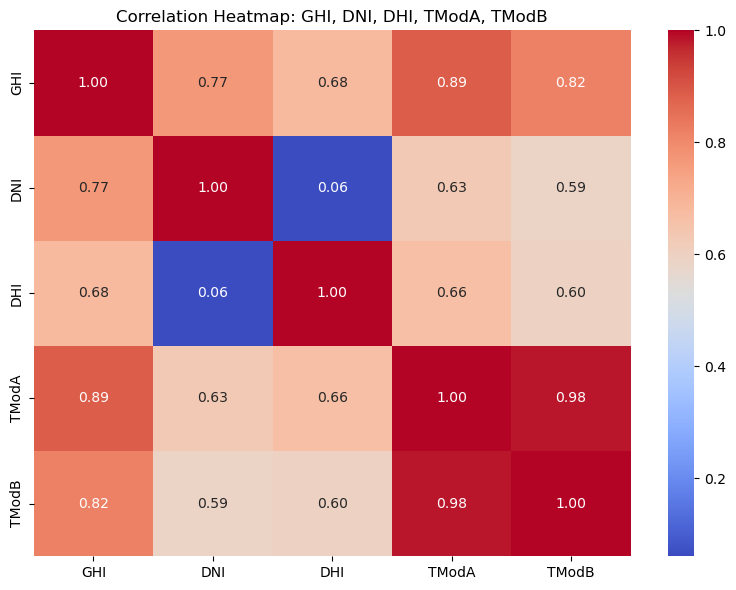

In [20]:
Correlation_cols = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB']
Correlation_matrix = df_clean[Correlation_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(Correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap: GHI, DNI, DHI, TModA, TModB")
plt.tight_layout()
plt.show()

## Scatter plot

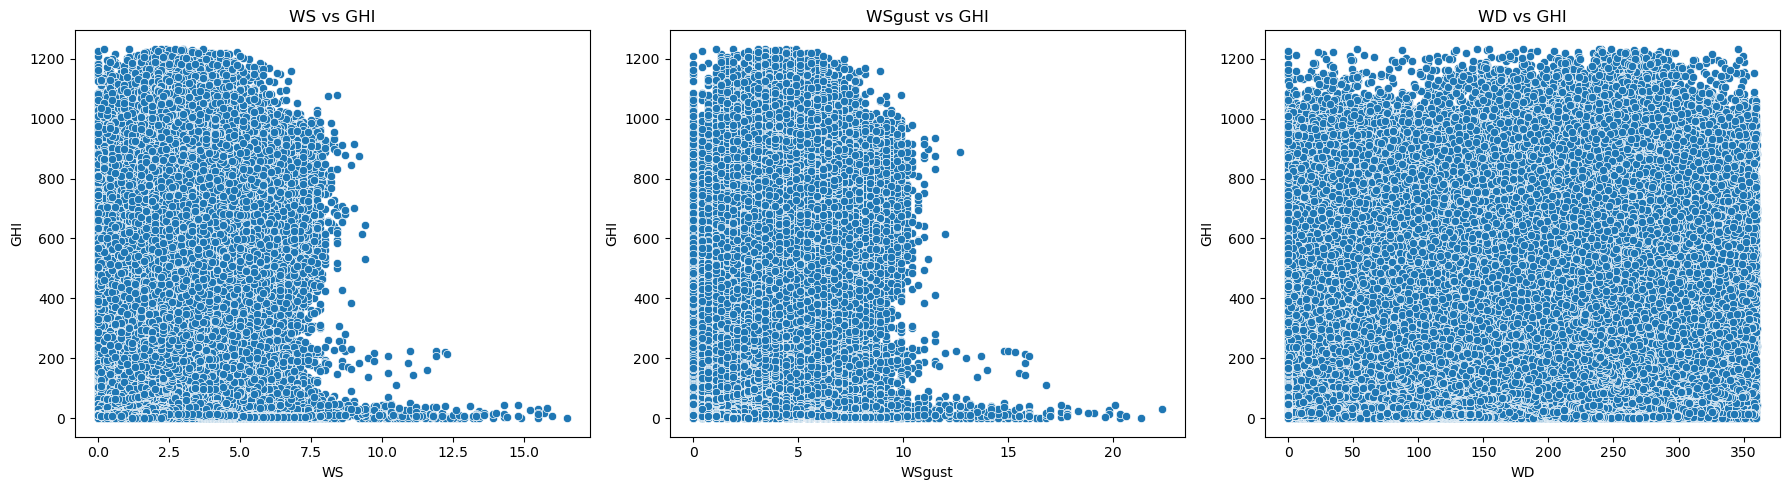

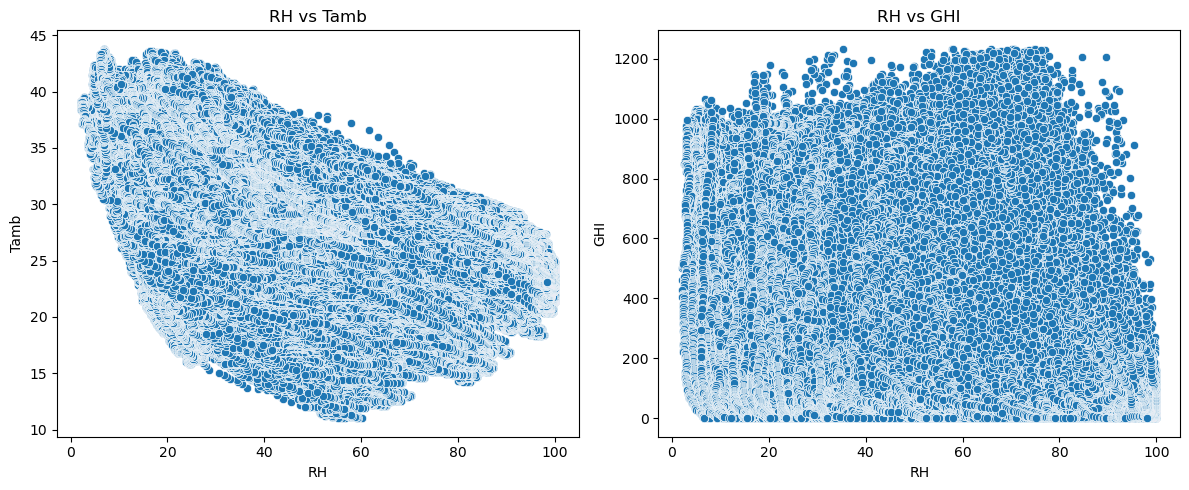

In [21]:
fig, axs = plt.subplots(1, 3, figsize=(18, 5))
sns.scatterplot(data=df_clean, x='WS', y='GHI', ax=axs[0])
axs[0].set_title('WS vs GHI')
sns.scatterplot(data=df_clean, x='WSgust', y='GHI', ax=axs[1])
axs[1].set_title('WSgust vs GHI')
sns.scatterplot(data=df_clean, x='WD', y='GHI', ax=axs[2])
axs[2].set_title('WD vs GHI')
plt.tight_layout()
plt.show()

# Scatter: RH vs Tamb and RH vs GHI
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
sns.scatterplot(data=df_clean, x='RH', y='Tamb', ax=axs[0])
axs[0].set_title('RH vs Tamb')
sns.scatterplot(data=df_clean, x='RH', y='GHI', ax=axs[1])
axs[1].set_title('RH vs GHI')
plt.tight_layout()
plt.show()

In [22]:
## Temperature Analysis

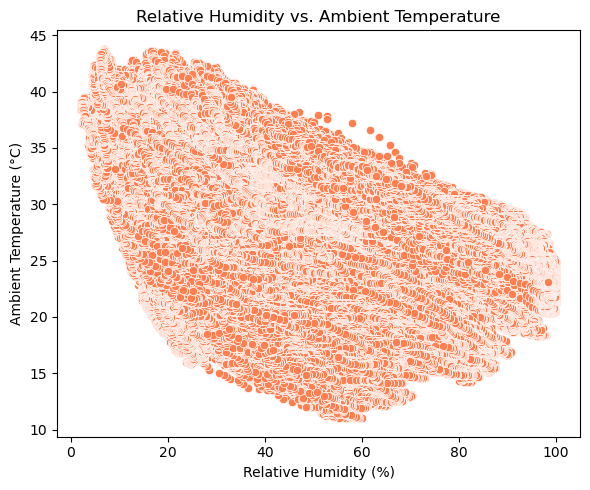

In [23]:

plt.figure(figsize=(6, 5))
sns.scatterplot(data=df_clean, x='RH', y='Tamb', color='coral')
plt.title('Relative Humidity vs. Ambient Temperature')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Ambient Temperature (°C)')
plt.tight_layout()
plt.show()

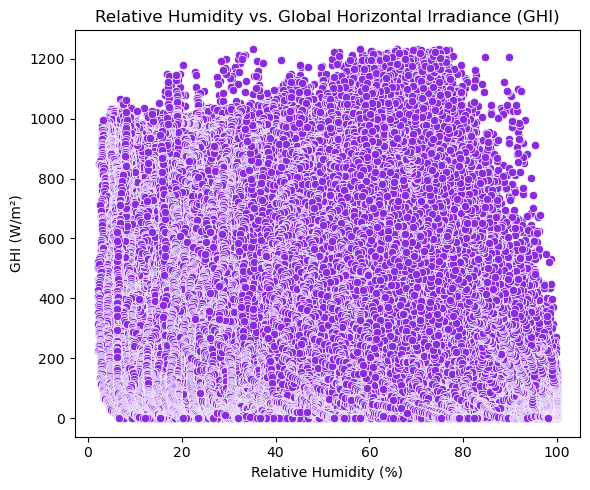

In [24]:
plt.figure(figsize=(6, 5))
sns.scatterplot(data=df_clean, x='RH', y='GHI', color='blueviolet')
plt.title('Relative Humidity vs. Global Horizontal Irradiance (GHI)')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('GHI (W/m²)')
plt.tight_layout()
plt.show()


## Bubble chart

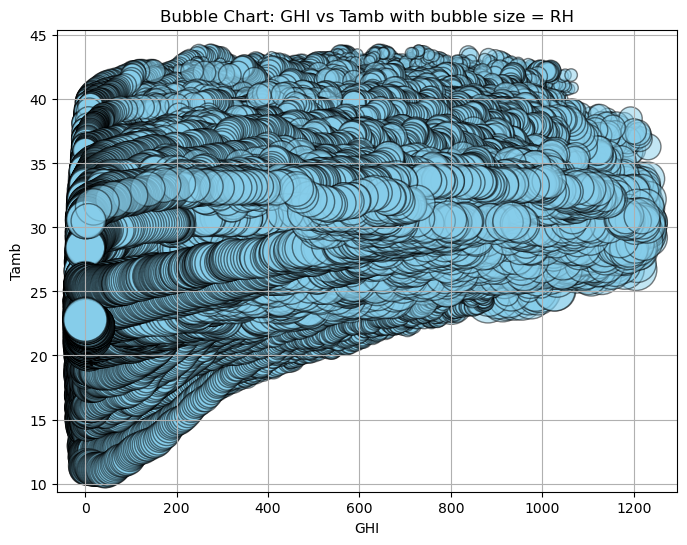

In [25]:
plt.figure(figsize=(8,6))
plt.scatter(
    df_clean['GHI'], 
    df_clean['Tamb'], 
    s=df_clean['RH'] * 10,  
    alpha=0.5, 
    c='skyblue', 
    edgecolors='black'
)
plt.xlabel('GHI')
plt.ylabel('Tamb')
plt.title('Bubble Chart: GHI vs Tamb with bubble size = RH')
plt.grid(True)
plt.show()